#### NLP stands for Natural Language Processing which is the task of mining the text and find out meaningful insights like Sentiments, Named Entity, Topics of Discussion and even Summary of the text.

#### With this dataset we will explore Sentiment Analaysis.

#### Since texts are free form, we need to apply a set of text cleaning techniques.

#### We can't apply texts to our ML model; we have to convert them in mathematical form and we will explore different techniques of Text Encoding.

#### I hope you will like it and please upvote!

#### Import the basic libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset.

In [2]:
dataset = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

#### Explore the dataset.

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
dataset['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

#### So we can see there are 2 columns - review and sentiment. sentiment is the target column that we need to predict. The dataset is completely balanced and it has equal number of positive and negative sentiments.

#### Let's take one review as sample and understand why we need to clean the text.

In [6]:
review = dataset['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

#### Normally any NLP task involves following text cleaning techniques -

1. Removal of HTML contents like "< br>".
2. Removal of punctutions, special characters like '\'.
3. Removal of stopwords like is, the which do not offer much insight.
4. Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.
5. Vectorization - Encode the numeric values once you have cleaned it.
6. Fit the data to the ML model.

#### We will apply all these techniques on this sample review and understand how it works.

#### First of all we will remove HTML contents.

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

#### We can see HTML tags are removed; so in the next step we will remove everything except lower/upper case letters using Regular Expressions.

In [8]:
import re

review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

#### Next we will bring everything into lowercase.

In [9]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

#### Stopwords removal - since stopwords removal works on every word in your text we need to split the text.

In [10]:
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

#### Stemming/Lemmatization - we will apply both and see the difference.

In [12]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [13]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

#### We can see that 'little' has become 'littl' after Stemming but remained 'little' after Lemmatization. We will use Lemmatization.

#### Merge the words to form cleaned up version of the text.

In [14]:
review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

#### Our next step will be to bring this text in mathematical forms and to do so we will create a Corpus first.

In [15]:
corpus = []
corpus.append(review)

#### To vectorize the text we will apply -

1. CountVectorizer (Bag of Words Model)
2. TfidfVectorizer (Bag of Words Model)
3. Keras Tokenizer (Embedding)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
review_count_vec = count_vec.fit_transform(corpus)

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]])

#### So we can see the data has become numeric with 1,2 and 3s based on the number of times they appear in the text.

#### There is another variation of CountVectorizer with binary=True and in that case all zero entries will have 1.

In [17]:
count_vec_bin = CountVectorizer(binary=True)
review_count_vec_bin = count_vec_bin.fit_transform(corpus)

review_count_vec_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

#### So there is no 2s and 3s in the vector.

#### We will now explore TF-IDF - TF stands for Text Frequency which means how many times a word (term) appears in a text (document). IDF means Inverse Document Frequency and is calculated as log(# of documents in corpus/# of documents containing the term).

#### Finally TF-IDF score is calculated as TF * IDF.

#### IDF acts as a balancing factor and diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
review_tfidf_vec = tfidf_vec.fit_transform(corpus)

review_tfidf_vec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

#### We will now apply all the techniques that we discussed on the whole dataset but there is no test dataset so we will keep 25% of the data aside to test the performance of the model.

In [19]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.25, random_state=42)

#### Convert sentiments to numeric forms.

In [20]:
train_data_label = (train_data_label.replace({'positive': 1, 'negative': 0})).values
test_data_label  = (test_data_label.replace({'positive': 1, 'negative': 0})).values

#### Clean the text and build the train and test corpus.

In [21]:
corpus_train = []
corpus_test  = []

for i in range(dataset_train.shape[0]):
    soup = BeautifulSoup(dataset_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(dataset_test.shape[0]):
    soup = BeautifulSoup(dataset_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

#### Let's validate one sample entry.

In [22]:
corpus_train[-1]

'decent movie although little bit short time pack lot action grit commonsense emotion time frame matt dillon main character great job movie emotion intensity convincing tense throughout movie typical fancy expensive hollywood cgi action movie satisfying movie indeed price evening great movie movie straight traditional action movie great acting story directing would recommend movie character development character good make believe actually seeing real event taking place movie believe made cheaper budget acting quality much higher'

In [23]:
corpus_test[-1]

'wonderfully funny awe inspiring feature pioneer turntablism dj shadow q bert amazing terrific documentary check every major dj crediting getting scratch thanks herbie hancock post bop classic rockit archival footage complex mind blowing turntable routine time'

#### We will now vectorize using TF-IDF technique.

In [24]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)

#### I am going to use LinearSVC as my first model.

In [25]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidf_vec_train, train_data_label)

predict = linear_svc.predict(tfidf_vec_test)

#### Let's see the performance.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      6157
    Positive       0.89      0.92      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5467  690]
 [ 524 5819]]
Accuracy: 
 0.90288


#### Now we will vectorize using CountVectorizer(binary=False) and fit it on LinearSVC model.

In [27]:
count_vec = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train = count_vec.fit_transform(corpus_train)
count_vec_test = count_vec.transform(corpus_test)

In [72]:
linear_svc_count = LinearSVC(C=0.5, random_state=42, max_iter=5000)
linear_svc_count.fit(count_vec_train, train_data_label)

predict_count = linear_svc_count.predict(count_vec_test)

#### Let's measure its performance.

In [73]:
print("Classification Report: \n", classification_report(test_data_label, predict_count,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_count))
print("Accuracy: \n", accuracy_score(test_data_label, predict_count))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.89      0.90      6157
    Positive       0.90      0.90      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5489  668]
 [ 611 5732]]
Accuracy: 
 0.89768


#### Now we will vectorize using CountVectorizer(binary=True) and fit it on LinearSVC model.

In [30]:
ind_vec = CountVectorizer(ngram_range=(1, 3), binary=True)
ind_vec_train = ind_vec.fit_transform(corpus_train)
ind_vec_test = ind_vec.transform(corpus_test)

In [31]:
linear_svc_ind = LinearSVC(C=0.5, random_state=42)
linear_svc_ind.fit(ind_vec_train, train_data_label)

predict_ind = linear_svc_ind.predict(ind_vec_test)

#### Let's measure its performance.

In [32]:
print("Classification Report: \n", classification_report(test_data_label, predict_ind,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_ind))
print("Accuracy: \n", accuracy_score(test_data_label, predict_ind))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      6157
    Positive       0.89      0.90      0.90      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

Confusion Matrix: 
 [[5461  696]
 [ 621 5722]]
Accuracy: 
 0.89464


#### So we are getting maximum accuracy using TF-IDF vectorizer.

#### We will now fit the data to Multinomial Naive Bayes classifier. Bayesian model uses prior probabilities to predict posterior probabilites which is helpful for classification with discrete features like text classification.

In [33]:
tfidf_vec_NB = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vec_train_NB = tfidf_vec_NB.fit_transform(corpus_train)

tfidf_vec_test_NB = tfidf_vec_NB.transform(corpus_test)

print(tfidf_vec_train_NB.toarray().shape, tfidf_vec_test_NB.toarray().shape)

(37500, 81301) (12500, 81301)


#### So there are 81301 terms in the corpus and we will use a *Chi-Square* test to select top 50000 features.

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=50000)
tfidf_vec_train_NB = ch2.fit_transform(tfidf_vec_train_NB, train_data_label)
tfidf_vec_test_NB  = ch2.transform(tfidf_vec_test_NB)

#### We can see the top features as well.

In [35]:
feature_names = tfidf_vec_NB.get_feature_names()
feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[32245]

'paperhouse'

#### Let's fit the data to Multinomial Naive Bayes model.

In [36]:
from sklearn.naive_bayes import MultinomialNB

multi_clf = MultinomialNB()
multi_clf.fit(tfidf_vec_train_NB, train_data_label)

predict_NB = multi_clf.predict(tfidf_vec_test_NB)

#### Let's measure its performance.

In [37]:
print("Classification Report: \n", classification_report(test_data_label, predict_NB,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.85      0.88      0.87      6157
    Positive       0.88      0.85      0.87      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500

Confusion Matrix: 
 [[5424  733]
 [ 938 5405]]
Accuracy: 
 0.86632


#### The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work. We will now use CountVectorizer as our Bag-of-Words model before applying MultinomialNB model.

In [38]:
count_vec_NB = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train_NB = count_vec_NB.fit_transform(corpus_train)
count_vec_test_NB = count_vec_NB.transform(corpus_test)

In [39]:
multi_clf_count = MultinomialNB()
multi_clf_count.fit(count_vec_train_NB, train_data_label)

predict_NB_count = multi_clf_count.predict(count_vec_test_NB)

In [40]:
print("Classification Report: \n", classification_report(test_data_label, predict_NB_count,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB_count))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB_count))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.88      0.89      0.89      6157
    Positive       0.90      0.88      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

Confusion Matrix: 
 [[5503  654]
 [ 752 5591]]
Accuracy: 
 0.88752


#### So LinearSVC using TF-IDF vectorization gives the maximum accuracy and we can see the outcome on our makeshift test dataset.

In [41]:
dataset_predict = dataset_test.copy()
dataset_predict = pd.DataFrame(dataset_predict)
dataset_predict.columns = ['review']
dataset_predict = dataset_predict.reset_index()
dataset_predict = dataset_predict.drop(['index'], axis=1)
dataset_predict.head()

,review
0,I really liked this Summerslam due to the look...
1,Not many television shows appeal to quite as m...
2,The film quickly gets to a major chase scene w...
3,Jane Austen would definitely approve of this o...
4,Expectations were somewhat high for me when I ...


In [42]:
test_actual_label = test_data_label.copy()
test_actual_label = pd.DataFrame(test_actual_label)
test_actual_label.columns = ['sentiment']
test_actual_label['sentiment'] = test_actual_label['sentiment'].replace({1: 'positive', 0: 'negative'})

In [43]:
test_predicted_label = predict.copy()
test_predicted_label = pd.DataFrame(test_predicted_label)
test_predicted_label.columns = ['predicted_sentiment']
test_predicted_label['predicted_sentiment'] = test_predicted_label['predicted_sentiment'].replace({1: 'positive', 0: 'negative'})

In [44]:
test_result = pd.concat([dataset_predict, test_actual_label, test_predicted_label], axis=1)
test_result.head()

,review,sentiment,predicted_sentiment
0,I really liked this Summerslam due to the look...,positive,negative
1,Not many television shows appeal to quite as m...,positive,positive
2,The film quickly gets to a major chase scene w...,negative,negative
3,Jane Austen would definitely approve of this o...,positive,positive
4,Expectations were somewhat high for me when I ...,negative,negative


#### We can apply Recurrent Neural Networks like LSTM to perform sentiment analysis and we have a different vectorization technique called *Word Embeddings*.

#### Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, we do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

Reference: https://www.tensorflow.org/tutorials/text/word_embeddings

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Masking, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Let's understand how it works.

In [46]:
text = ['subha is a good boy', 'swati is a very good girl', 'yes...we will go home for sure', 'India"s gdp is less than USA.']

#### Think this is our text which we need to vectorize.

In [47]:
text

['subha is a good boy',
 'swati is a very good girl',
 'yes...we will go home for sure',
 'India"s gdp is less than USA.']

In [48]:
tokenizer = Tokenizer(num_words=20)

tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
sequences

[[4, 1, 2, 3, 5],
 [6, 1, 2, 7, 3, 8],
 [9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 1, 19]]

#### So we can see we are able to tokenize the textual data.

In [49]:
tokenizer.word_index

{'is': 1,
 'a': 2,
 'good': 3,
 'subha': 4,
 'boy': 5,
 'swati': 6,
 'very': 7,
 'girl': 8,
 'yes': 9,
 'we': 10,
 'will': 11,
 'go': 12,
 'home': 13,
 'for': 14,
 'sure': 15,
 'india': 16,
 's': 17,
 'gdp': 18,
 'less': 19,
 'than': 20,
 'usa': 21}

#### Now we can see that the 4 lines in the text have different length; so we need to standardize their length thru a technique called *Padding*.

#### padding='post' means zeroes will be appended after actual text and vice versa if padding='pre'.

In [50]:
data = pad_sequences(sequences, maxlen=8, padding='post')
data

array([[ 4,  1,  2,  3,  5,  0,  0,  0],
       [ 6,  1,  2,  7,  3,  8,  0,  0],
       [ 9, 10, 11, 12, 13, 14, 15,  0],
       [16, 17, 18,  1, 19,  0,  0,  0]], dtype=int32)

In [51]:
word_index = tokenizer.word_index
len(word_index)

21

In [52]:
embedding = Embedding(input_dim=20, output_dim=4, mask_zero=True)
masked_output = embedding(data)

print(masked_output.numpy())

[[[-0.0432887   0.03164933 -0.00403056 -0.04804061]
  [-0.01957107 -0.01933433  0.03954187  0.03204051]
  [-0.01322449  0.02540943  0.03557068 -0.01157781]
  [ 0.00745217  0.04525444 -0.04387034  0.03782446]
  [-0.0138635  -0.04703224 -0.04861773  0.03589484]
  [ 0.03547157  0.04444233 -0.03654457 -0.00354902]
  [ 0.03547157  0.04444233 -0.03654457 -0.00354902]
  [ 0.03547157  0.04444233 -0.03654457 -0.00354902]]

 [[ 0.01828201 -0.016997   -0.00675575  0.01074212]
  [-0.01957107 -0.01933433  0.03954187  0.03204051]
  [-0.01322449  0.02540943  0.03557068 -0.01157781]
  [-0.01897731  0.04091717  0.03567977  0.00077902]
  [ 0.00745217  0.04525444 -0.04387034  0.03782446]
  [-0.01512621 -0.0039081  -0.04954964 -0.02603902]
  [ 0.03547157  0.04444233 -0.03654457 -0.00354902]
  [ 0.03547157  0.04444233 -0.03654457 -0.00354902]]

 [[-0.04542319  0.03954801  0.01623838  0.03315142]
  [ 0.04721813  0.0471813   0.00959809  0.01618664]
  [-0.01843439  0.01646802 -0.04238181  0.00747667]
  [-0.00

In [53]:
print("Shape before Embedding: \n", data.shape)
print("Shape after Embedding: \n", masked_output.shape)

Shape before Embedding: 
 (4, 8)
Shape after Embedding: 
 (4, 8, 4)


#### So we can see that the 4x8 array is converted to a 4x8x4 tensor.

#### Let's proceed with the LSTM model.

In [54]:
max_features = 20000
maxlen = 200
tokenizer = Tokenizer(num_words=max_features)

In [55]:
train = pd.DataFrame(dataset_train)
train.columns = ['review']

test = pd.DataFrame(dataset_test)
test.columns = ['review']

#### Apply the Tokenizer.

In [56]:
tokenizer.fit_on_texts(train['review'])
X_train_token = tokenizer.texts_to_sequences(train['review'])

tokenizer.fit_on_texts(test['review'])
X_test_token = tokenizer.texts_to_sequences(test['review'])

#### Apply the Padding.

In [57]:
X_train = pad_sequences(X_train_token, maxlen=maxlen, padding='post')
X_test  = pad_sequences(X_test_token, maxlen=maxlen, padding='post')
print(X_train.shape, X_test.shape)

(37500, 200) (12500, 200)


In [58]:
y_train = train_data_label.copy()
y_test  = test_data_label.copy()

In [65]:
model = Sequential([Embedding(max_features, 64, mask_zero=True),
                    Bidirectional(LSTM(64, dropout=0.2)),
                    Dense(64, activation='sigmoid'),
                    Dense(1)])

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=3,
                    validation_data=(X_test, y_test))

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 204s 5ms/sample - loss: 0.7500 - accuracy: 0.7605 - val_loss: 0.9024 - val_accuracy: 0.5224
Epoch 2/3
37500/37500 [==============================] - 215s 6ms/sample - loss: 0.4252 - accuracy: 0.8467 - val_loss: 0.8247 - val_accuracy: 0.6068
Epoch 3/3
37500/37500 [==============================] - 195s 5ms/sample - loss: 0.3107 - accuracy: 0.8925 - val_loss: 0.7758 - val_accuracy: 0.5749


#### Plotting model performance.

In [68]:
history.history

{'loss': [0.7500120658278465, 0.4251585150063038, 0.31073401839037734],
 'accuracy': [0.76048, 0.8467467, 0.8924533],
 'val_loss': [0.9024018847942352, 0.824690181016922, 0.7757944264411927],
 'val_accuracy': [0.5224, 0.6068, 0.57488]}

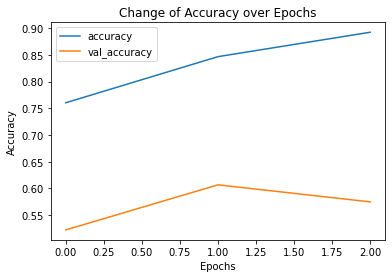

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

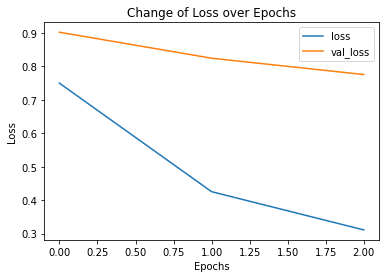

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

#### We can conclude that Bi-directional LSTM takes more time to train and is performing poorly compared to TF-IDF vectorization and Linear Classifier or Multinomial Naive Bayes Classifier.